<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/2_Workflow_of_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking the GPU and CUDA version first

In [18]:
!nvidia-smi

Thu Jan 22 22:20:50 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## End-to-end workflow of PyTorch
* Getting the data ready and turining to tensors
* Building or picking a pre-trained model
  * Loss Function & Optimizer (if the predictions are poor)
  * Build a Training Loop (if the predictions are poor)
* Fitting the model on data & Making predictions (inference)
* Evaluation
* Experimenting and saving the model

In [19]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn  # Contains buidling blcoks related to pytorch for neural networks
torch.__version__

'2.9.0+cu126'

## Getting the data ready
* Creating known data using Linear Regression
* Used Linear Regression formula **y = (wX + b)** to make a straight line with known parameters.

In [20]:
# Known Parameters
weight = 0.8
bias = 0.2

start = 0
end = 2
step = 0.04
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5], len(X), len(y)

(tensor([[0.0000],
         [0.0400],
         [0.0800],
         [0.1200],
         [0.1600]]),
 tensor([[0.2000],
         [0.2320],
         [0.2640],
         [0.2960],
         [0.3280]]),
 50,
 50)

## Splitting data into train and test sets
* Training: Mode learns patterns from this data set (70%-80%)
* Validation: The model will get tuned on validation data set(10%-20%)
* Test: The model will be evaluated on this set(unseen data 10%-20%)

Note: Validation set is not always required, Train and Test are most imp steps.

In [21]:
# Creating train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [22]:
X_test, y_test

(tensor([[1.6000],
         [1.6400],
         [1.6800],
         [1.7200],
         [1.7600],
         [1.8000],
         [1.8400],
         [1.8800],
         [1.9200],
         [1.9600]]),
 tensor([[1.4800],
         [1.5120],
         [1.5440],
         [1.5760],
         [1.6080],
         [1.6400],
         [1.6720],
         [1.7040],
         [1.7360],
         [1.7680]]))

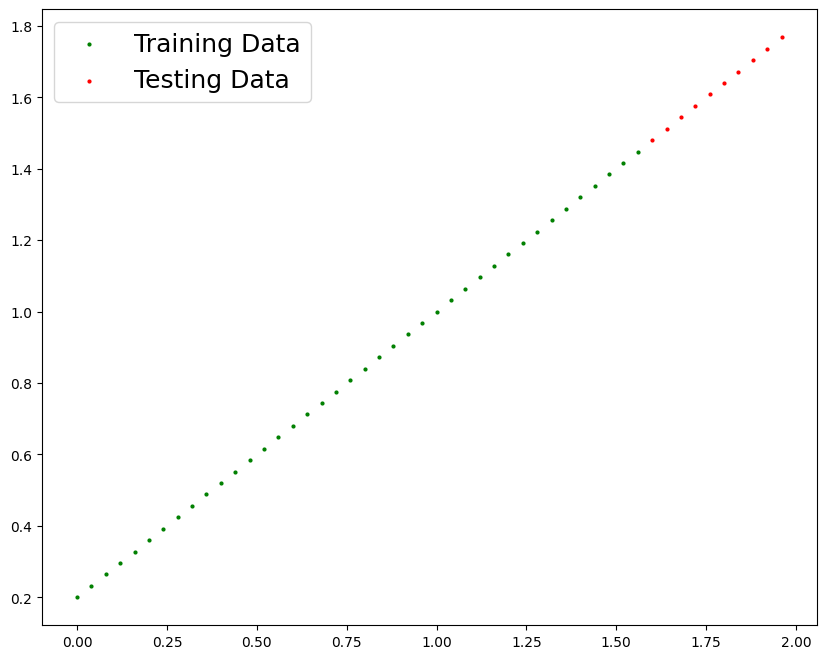

In [23]:
# Visualizing using matplotlib
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  the plot will show train data, test data, and will compare preds
  """
  plt.figure(figsize=(10, 8))

  # Choosing color for train data
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training Data")

  # For testing data
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

  # For Predictions
  if predictions is not None:
      plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")

  # Legends
  plt.legend(prop={"size": 18});

plot_predictions()

## Buidling the model
* Started with random values like weights and bias
* Adjust the random values to get closer to ideal values, by looking at training data.
* Two main algorithms are Gradient Descent and Backpropogation. (these will be triggered)

In [24]:
# Creating liner regression model class with a nn.module, which is a base class module that PyTorch inherits the most of models, neural networks etc

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initializing Model Params
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

## Buidling Essentials in PyTorch
* torch.nn : a neural network module in PyTorch, which provides buidling blocks to build, train, and evaluate the nn.
* nn.Parameter : Type of tensor tells the PyTorch, that this tensor is a trainable parameter of the model. Here, **weight** and **bias** are the traianable parameters.
* nn.Module : **base class** for all the neural network modules. If this is considered as subclass, then should be overwrited using forward().
* def forward() : A method inside nn.Module that tells how a data flows(forward computation) through model to produce output.
* torch.optim : Contains optimization algorithms like Gradient Descent which optimizes the model parameters by reducing the loss function.
* torchmetrics : for evaluating the model
* torch.utils.tensorboard : Improving the model through experimentation

 ### Inside the Model & Creating an instnace of Model

In [25]:
# random seed
torch.manual_seed(38)

# Creating an instance of model
model_1 = LinearRegressionModel()

# Checking out the params
list(model_1.parameters())

[Parameter containing:
 tensor([1.5060], requires_grad=True),
 Parameter containing:
 tensor([0.1456], requires_grad=True)]

## Making predictions or Inference
* Predictions on y_test data using the X_test. Here, the data will be ran through forward() method.

In [26]:
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[2.5552],
        [2.6155],
        [2.6757],
        [2.7359],
        [2.7962],
        [2.8564],
        [2.9167],
        [2.9769],
        [3.0371],
        [3.0974]])

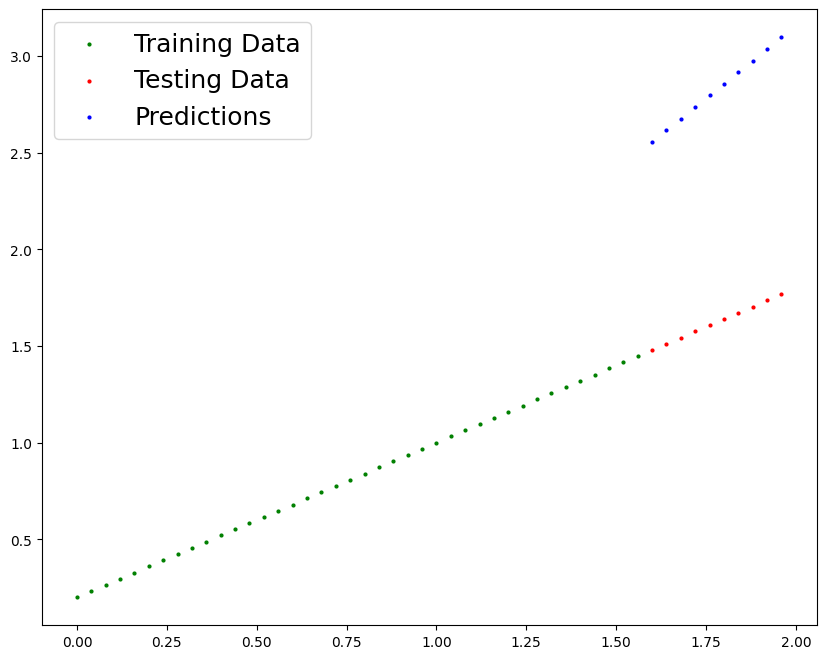

In [27]:
# visualizing (as the variables and internal parameters are randomly initialized, the predictions are quite closer to random)
plot_predictions(predictions=y_preds)

## Training the model to move from random params to known params
* Improving model to represent data in a better way
* To measure how poor the model predictions, a **loss function (cost function, criterion)** can be used.
* Function that measures **how wrong the model predictions are to the ideal outputs** is a loss function. The lower the loss function, the better the model.
* **Optimizer** for adjusting models parameters by minimizing the loss values.
* lr stands for **learning rate**, the higher the learning rate the more it adjusts the model parameters.


In [28]:
# Checking loss function of y_preds
import torch.nn as nn
loss_fn = nn.L1Loss()

loss = loss_fn(y_preds, y_test)
loss

tensor(1.2023)

In [29]:
# Setting up an optimizer (SGD which randomly adjusts the random values until minimizing the loss values), with a learning rate
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)